In [ ]:
###

In [28]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [29]:
# Load the CSV file into a DataFrame
file_path = 'mhealth.csv'
mhealth = pd.read_csv(file_path)
mhealth.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [30]:
# checking the data types
mhealth.dtypes

alx         float64
aly         float64
alz         float64
glx         float64
gly         float64
glz         float64
arx         float64
ary         float64
arz         float64
grx         float64
gry         float64
grz         float64
Activity      int64
subject      object
dtype: object

In [31]:
# check dimension of the dataset
print(mhealth.shape)

(999999, 14)


**Data Exploration**

In [32]:
# Display summary statistics
print(mhealth.describe())

                 alx            aly            alz            glx  \
count  999999.000000  999999.000000  999999.000000  999999.000000   
mean        1.473954      -9.618162      -0.944714      -0.023928   
std         3.751845       4.076683       5.333969       0.495758   
min       -22.146000     -19.619000     -19.373000      -2.146600   
25%         0.115100     -10.116000      -2.662400      -0.454550   
50%         1.336800      -9.644800      -0.016372      -0.070501   
75%         2.586900      -9.034300       1.371500       0.426720   
max        20.054000      21.161000      25.015000      60.484000   

                 gly            glz            arx           ary  \
count  999999.000000  999999.000000  999999.000000  999999.00000   
mean       -0.616830      -0.131466      -3.578801      -5.72591   
std         0.354135       0.547774       4.770602       5.70559   
min        -7.789900      -2.567800     -22.361000     -18.97200   
25%        -0.816140      -0.561890   

In [33]:
# Why are we dropping the "Nothing coloumn?"


#dropping 0 from Activity column as it corresponds to "Nothing"
mhealth = mhealth[mhealth['Activity'] != 0]



In [34]:
mhealth.drop(mhealth[mhealth['Activity'] == 0].index, inplace=True)


In [35]:
mhealth.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
6656,2.6493,-9.4517,0.37683,-0.20965,-0.88931,-0.50884,-2.8439,-9.0618,1.8177,-0.058824,-0.93429,-0.34483,1,subject1
6657,2.4157,-9.5306,0.40179,-0.20965,-0.88931,-0.50884,-2.9935,-9.2048,1.5189,-0.058824,-0.93429,-0.34483,1,subject1
6658,2.3865,-9.5991,0.48141,-0.20037,-0.86867,-0.50688,-2.8846,-9.1945,1.5507,-0.058824,-0.93429,-0.34483,1,subject1
6659,2.3758,-9.5997,0.42919,-0.20037,-0.86867,-0.50688,-2.9245,-9.1746,1.5413,-0.078431,-0.93429,-0.34052,1,subject1
6660,2.3239,-9.5406,0.40038,-0.20037,-0.86867,-0.50688,-2.8963,-9.2039,1.6127,-0.078431,-0.93429,-0.34052,1,subject1


In [36]:
# Converting categorical features in Activity that are stored as int to Categories so we can visualize easier
mhealth['Activity'].replace({
    1: 'Standing still',
    2: 'Sitting and relaxing',
    3: 'Lying down',
    4: 'Walking',
    5: 'Climbing stairs',
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms',
    8: 'Crouching',
    9: 'Cycling',
    10: 'Jogging',
    11: 'Running',
    12: 'Jump front & back'}, inplace=True)

In [40]:
#Group the data by subject and Activity
grouped_data = mhealth[['subject','Activity']]
grouped_data = grouped_data.groupby(['subject'])['Activity'].value_counts()
grouped_data

subject   Activity                 
subject1  Crouching                    3379
          Climbing stairs              3072
          Cycling                      3072
          Frontal elevation of arms    3072
          Jogging                      3072
                                       ... 
subject8  Crouching                    2560
          Waist bends forward          2151
          Jump front & back            1024
subject9  Standing still               3072
          Sitting and relaxing          830
Name: Activity, Length: 98, dtype: int64

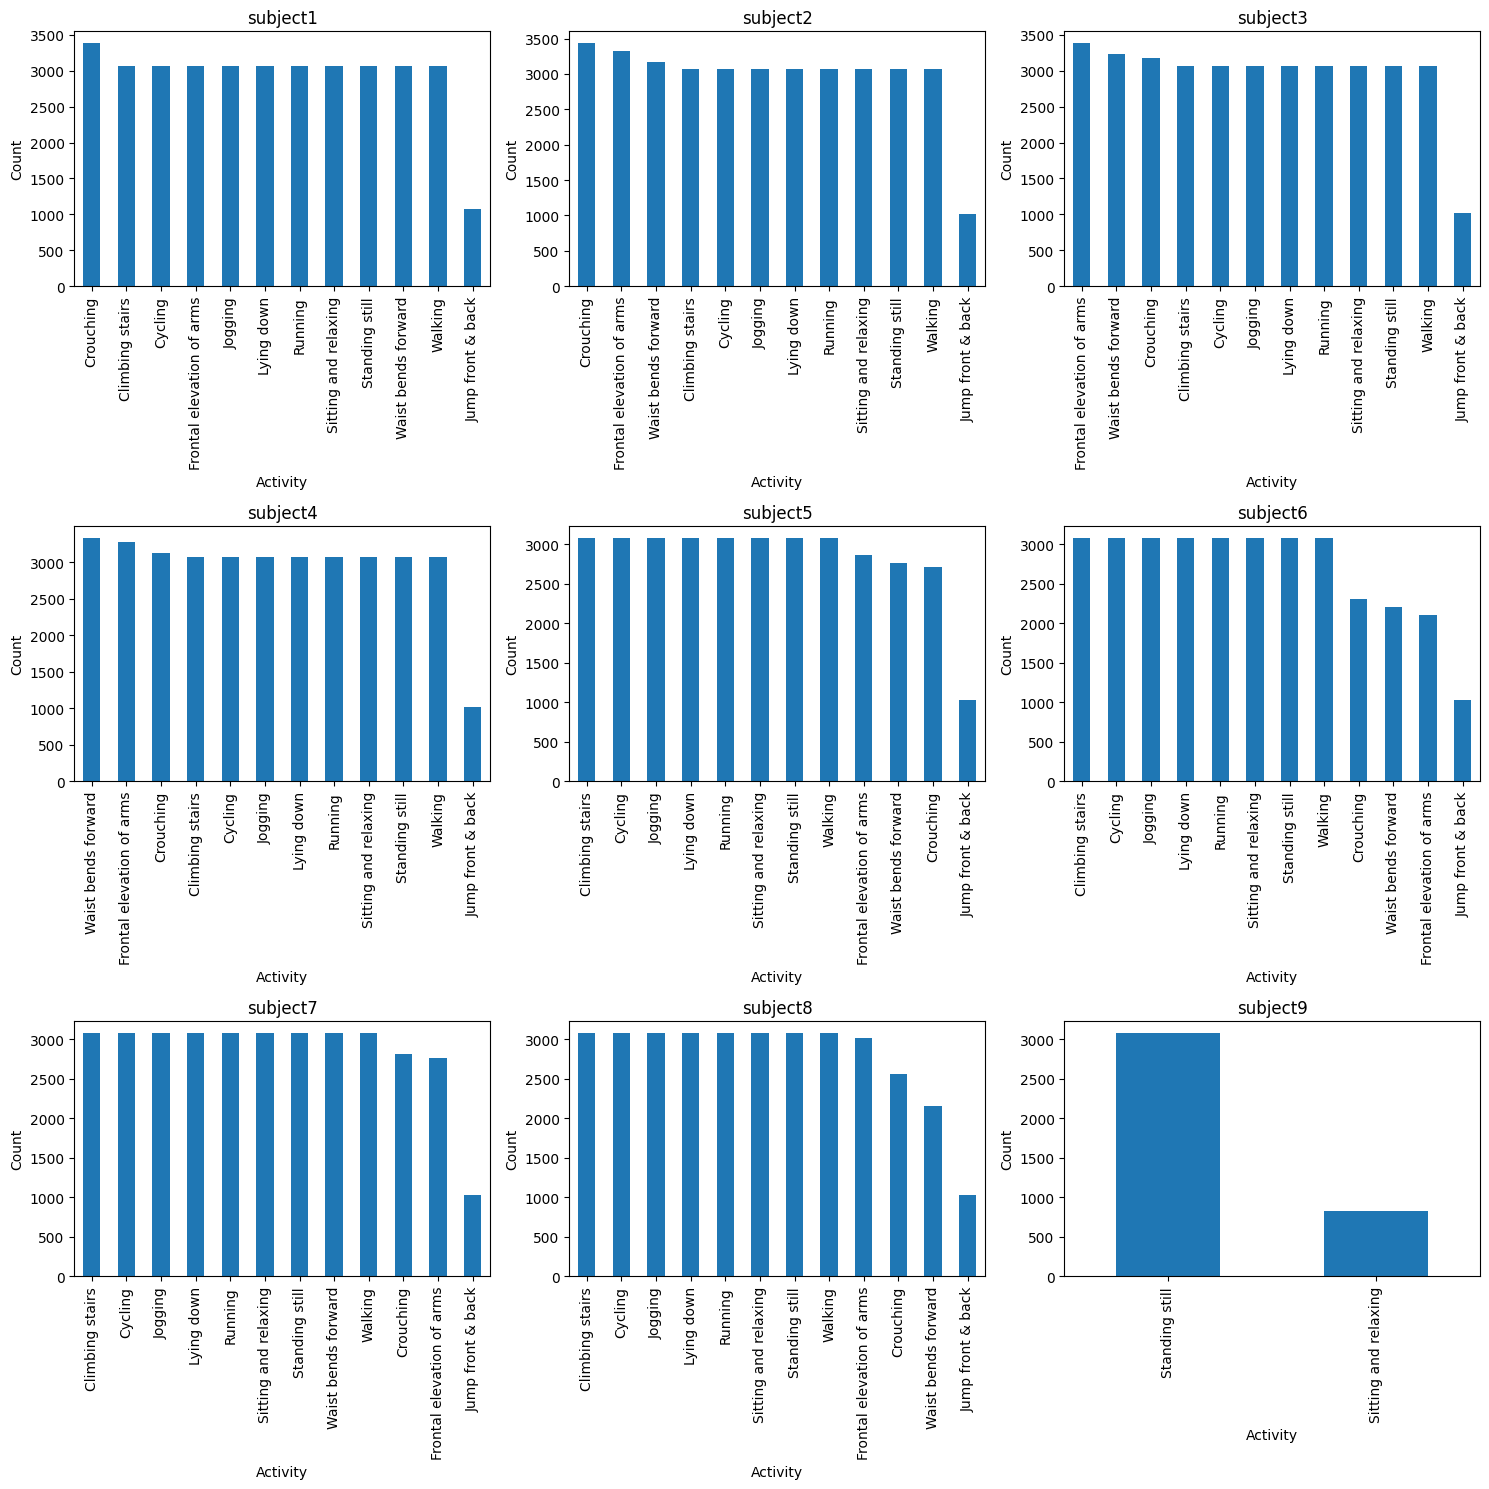

In [41]:
#visualize the dataset by Activity and subject
import matplotlib.pyplot as plt

# Reset the index to make it a DataFrame
grouped_data = grouped_data.reset_index(name='count')

# Get unique subjects for subplots
subjects = grouped_data['subject'].unique()

# Create subplots in a 3 by 3 configuration
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Plot histograms for each subject in the configuration
for i, subject in enumerate(subjects):
    ax = axes[i // 3, i % 3]
    data = grouped_data[grouped_data['subject'] == subject]
    data.plot(kind='bar', x='Activity', y='count', ax=ax, title=f'{subject}', legend=False)
    ax.set_xlabel('Activity')
    ax.set_ylabel('Count')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

Plots show 1) Subject 9 has limited data and should be dropped 2) jump front & back column needs balancing (upsampling)



In [42]:
# Converting categorical features back to numerical
mhealth['Activity'].replace({
  'Standing still' : 1,
  'Sitting and relaxing' : 2,
  'Lying down' : 3,
  'Walking' : 4,
  'Climbing stairs' : 5 ,
  'Waist bends forward' : 6,
  'Frontal elevation of arms' : 7,
  'Crouching' : 8,
  'Cycling' : 9,
  'Jogging' : 10,
  'Running' : 11,
  'Jump front & back' : 12}, inplace=True)

In [43]:
#checking
mhealth.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
6656,2.6493,-9.4517,0.37683,-0.20965,-0.88931,-0.50884,-2.8439,-9.0618,1.8177,-0.058824,-0.93429,-0.34483,1,subject1
6657,2.4157,-9.5306,0.40179,-0.20965,-0.88931,-0.50884,-2.9935,-9.2048,1.5189,-0.058824,-0.93429,-0.34483,1,subject1
6658,2.3865,-9.5991,0.48141,-0.20037,-0.86867,-0.50688,-2.8846,-9.1945,1.5507,-0.058824,-0.93429,-0.34483,1,subject1
6659,2.3758,-9.5997,0.42919,-0.20037,-0.86867,-0.50688,-2.9245,-9.1746,1.5413,-0.078431,-0.93429,-0.34052,1,subject1
6660,2.3239,-9.5406,0.40038,-0.20037,-0.86867,-0.50688,-2.8963,-9.2039,1.6127,-0.078431,-0.93429,-0.34052,1,subject1


**Data Processing**

In [44]:
#drop subject 9 given limited Activity data and much smaller range (counts)
#checking rows before drop
rows_before_drop = len(mhealth)
print(rows_before_drop)

279053


In [45]:
#drop subject 9 given limited Activity data and much smaller range (counts)

rows_before_drop = len(mhealth)
mhealth = mhealth[mhealth['subject'] != 'subject9']

In [46]:
mhealth.drop(mhealth[mhealth['subject'] == 'subject9'].index, inplace=True)


In [47]:
#checking drop after
rows_after_drop = len(mhealth)
print(rows_after_drop)

275151


In [48]:
# check missing value
print(mhealth.isnull().sum())

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64


<Axes: >

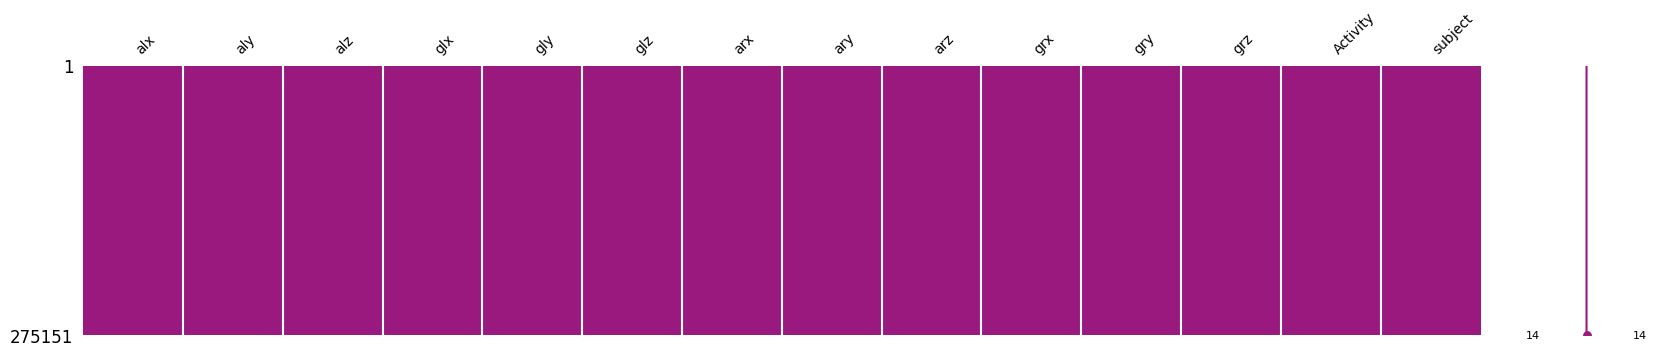

In [49]:
#missing data visualize
# !pip install missingno
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(mhealth, figsize=(20,3.5), fontsize=10, color=(.6,.1,0.5))

In [50]:
#Running one_hot encoding on subject column
categorical_columns = mhealth.select_dtypes(include='object').columns.tolist() #select all columns with 'object'

In [51]:
#create new dataframe called mhealthenc with one-hot encoding for subject column
mhealthenc = pd.get_dummies(mhealth, columns=categorical_columns)

mhealthenc.head() #checking the head with the new hot-encoded library: mhealthenc

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,...,grz,Activity,subject_subject1,subject_subject2,subject_subject3,subject_subject4,subject_subject5,subject_subject6,subject_subject7,subject_subject8
6656,2.6493,-9.4517,0.37683,-0.20965,-0.88931,-0.50884,-2.8439,-9.0618,1.8177,-0.058824,...,-0.34483,1,1,0,0,0,0,0,0,0
6657,2.4157,-9.5306,0.40179,-0.20965,-0.88931,-0.50884,-2.9935,-9.2048,1.5189,-0.058824,...,-0.34483,1,1,0,0,0,0,0,0,0
6658,2.3865,-9.5991,0.48141,-0.20037,-0.86867,-0.50688,-2.8846,-9.1945,1.5507,-0.058824,...,-0.34483,1,1,0,0,0,0,0,0,0
6659,2.3758,-9.5997,0.42919,-0.20037,-0.86867,-0.50688,-2.9245,-9.1746,1.5413,-0.078431,...,-0.34052,1,1,0,0,0,0,0,0,0
6660,2.3239,-9.5406,0.40038,-0.20037,-0.86867,-0.50688,-2.8963,-9.2039,1.6127,-0.078431,...,-0.34052,1,1,0,0,0,0,0,0,0


In [52]:
#Since we are only using the lower arm sensor data, drop the left-ankle sensor Acceleration and Gyro data: alx, aly, alz, glx, gly, glz
columns_to_drop = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz']
mhealthenc.drop(columns=columns_to_drop, inplace=True)


In [53]:
mhealthenc.head() #checking

,arx,ary,arz,grx,gry,grz,Activity,subject_subject1,subject_subject2,subject_subject3,subject_subject4,subject_subject5,subject_subject6,subject_subject7,subject_subject8
6656,-2.8439,-9.0618,1.8177,-0.058824,-0.93429,-0.34483,1,1,0,0,0,0,0,0,0
6657,-2.9935,-9.2048,1.5189,-0.058824,-0.93429,-0.34483,1,1,0,0,0,0,0,0,0
6658,-2.8846,-9.1945,1.5507,-0.058824,-0.93429,-0.34483,1,1,0,0,0,0,0,0,0
6659,-2.9245,-9.1746,1.5413,-0.078431,-0.93429,-0.34052,1,1,0,0,0,0,0,0,0
6660,-2.8963,-9.2039,1.6127,-0.078431,-0.93429,-0.34052,1,1,0,0,0,0,0,0,0


**Splitting**

In [54]:
#From Arij: below is the code from the tutorial on how to do splitting but keeping records from the
#same 'patient_nbr' ('subject' in our case) together in either the training or testing set. I couldn't apply this code to our dataset
#because we have one hot encoded the subject column.
from sklearn.model_selection import train_test_split

# Grouping by 'patient_nbr' and creating a list of dataframes, one per group
# grouped = df_encoded.groupby('patient_nbr')
# grouped_dfs = [group for _, group in grouped]

# Splitting the groups into training and test sets with an 80:20 ratio
# train_groups, test_groups = train_test_split(grouped_dfs, test_size=0.2, random_state=42)

# Reassembling the training and test datasets from the groups
# train_df = pd.concat(train_groups)
# test_df = pd.concat(test_groups)

# From Xiao: Arij, the following is what I found: I randomly splits 1-8 into 2 exclusive lists that contain the subject number.
# In our specific case, by setting a random seed, subjects [8, 2, 6, 1, 3, 4] are in the training set and subjects [5, 7] are in the test set.
# As a result, the actual split is not exactly 80% : 20%, but 758017 : 224256, which is approximately 22.8% : 77.2%.

import random

# Set the seed for reproducibility
random.seed(5230)

# Total subjects
total_subjects = 8

# Generating an 80% random list of subjects (training set)
num_training_subjects = int(total_subjects * 0.8)
training_subjects = random.sample(range(1, total_subjects + 1), num_training_subjects)

# Generating the remaining 20% as test subjects (test set)
test_subjects = [subject for subject in range(1, total_subjects + 1) if subject not in training_subjects]

# Creating a mask for training and testing
training_mask = mhealthenc[['subject_subject' + str(sub) for sub in training_subjects]].sum(axis=1).astype(bool)
test_mask = mhealthenc[['subject_subject' + str(sub) for sub in test_subjects]].sum(axis=1).astype(bool)

# Splitting the dataset
train_df = mhealthenc[training_mask]
test_df = mhealthenc[test_mask]

# Output the training and test subjects
print("Training Subjects:", training_subjects)
print("Test Subjects:", test_subjects)

# Displaying the shape of the training and test sets
train_df_shape = train_df.shape
test_df_shape = test_df.shape

print("Shapes of Training and Test Sets:", train_df_shape, test_df_shape)

Training Subjects: [8, 2, 6, 1, 3, 4]
Test Subjects: [5, 7]
Shapes of Training and Test Sets: (206951, 15) (68200, 15)


In [55]:
# To view the first few rows of the training and test sets
print(train_df.head())
print(test_df.head())

         arx     ary     arz       grx      gry      grz  Activity  \
6656 -2.8439 -9.0618  1.8177 -0.058824 -0.93429 -0.34483         1   
6657 -2.9935 -9.2048  1.5189 -0.058824 -0.93429 -0.34483         1   
6658 -2.8846 -9.1945  1.5507 -0.058824 -0.93429 -0.34483         1   
6659 -2.9245 -9.1746  1.5413 -0.078431 -0.93429 -0.34052         1   
6660 -2.8963 -9.2039  1.6127 -0.078431 -0.93429 -0.34052         1   

      subject_subject1  subject_subject2  subject_subject3  subject_subject4  \
6656                 1                 0                 0                 0   
6657                 1                 0                 0                 0   
6658                 1                 0                 0                 0   
6659                 1                 0                 0                 0   
6660                 1                 0                 0                 0   

      subject_subject5  subject_subject6  subject_subject7  subject_subject8  
6656               

**Normalization within each subject grouping**

In [56]:
train_df.dtypes

arx                 float64
ary                 float64
arz                 float64
grx                 float64
gry                 float64
grz                 float64
Activity              int64
subject_subject1      uint8
subject_subject2      uint8
subject_subject3      uint8
subject_subject4      uint8
subject_subject5      uint8
subject_subject6      uint8
subject_subject7      uint8
subject_subject8      uint8
dtype: object

In [57]:
# Identifying numerical columns (excluding 'Activity' ('subject_subject1' through 'subject_subject8': no need to remove because their dtype is uint8))
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('Activity')


# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both training and test data
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# Checking the first few rows of the normalized training data
train_df.head()

,arx,ary,arz,grx,gry,grz,Activity,subject_subject1,subject_subject2,subject_subject3,subject_subject4,subject_subject5,subject_subject6,subject_subject7,subject_subject8
6656,0.123111,-0.484823,-0.109975,0.435205,-0.934523,-1.316621,1,1,0,0,0,0,0,0,0
6657,0.097363,-0.506246,-0.179310,0.435205,-0.934523,-1.316621,1,1,0,0,0,0,0,0,0
6658,0.116106,-0.504703,-0.171931,0.435205,-0.934523,-1.316621,1,1,0,0,0,0,0,0,0
6659,0.109239,-0.501722,-0.174112,0.394485,-0.934523,-1.308603,1,1,0,0,0,0,0,0,0
6660,0.114092,-0.506112,-0.157544,0.394485,-0.934523,-1.308603,1,1,0,0,0,0,0,0,0


From Arij: Is the above code normalizing for the training and testing set seperately? It needs to. \\
From Xiao: Yes, I believe this code is indeed normalizing the training and test sets separately using the statistics from the training set.
From Benny: I do also believe it is

In [58]:
test_df.head()

,arx,ary,arz,grx,gry,grz,Activity,subject_subject1,subject_subject2,subject_subject3,subject_subject4,subject_subject5,subject_subject6,subject_subject7,subject_subject8
533761,0.256134,-0.551160,-0.407577,1.432877,-1.059587,0.106777,1,0,0,0,0,1,0,0,0
533762,0.216308,-0.533677,-0.483569,1.432877,-1.059587,0.106777,1,0,0,0,0,1,0,0,0
533763,0.200112,-0.545422,-0.445804,1.432877,-1.059587,0.106777,1,0,0,0,0,1,0,0,0
533764,0.195482,-0.569467,-0.457336,1.436947,-1.063065,0.126814,1,0,0,0,0,1,0,0,0
533765,0.169976,-0.531729,-0.413322,1.436947,-1.063065,0.126814,1,0,0,0,0,1,0,0,0


**Sequence creation for each subject**


In [59]:
# From Xiao: I feel like we still need to use the original "subject" column here;
# otherwise I do not know how to group by subject.
# So I added the "subject" column back to the training and test sets,
# and if you find there is a better way to group by subject,
# feel free to refute me.

# I call the training and tests sets without one-hot encoding "train_df_subject" and "test_df_subject".
# From Benny: This is fine
train_df_subject = train_df.copy()
test_df_subject = test_df.copy()

# Define a function to determine the subject
def determine_subject(row):
    for i in range(1, 9):
        if row[f"subject_subject{i}"] == 1:
            return i
    return None

# Apply the function to create the new 'subject' column
train_df_subject["subject"] = train_df_subject.apply(determine_subject, axis=1)
test_df_subject["subject"] = test_df_subject.apply(determine_subject, axis=1)

# Dropping the columns "subject_subject1" through "subject_subject8"
# in "train_df_subject" and "test_df_subject".
columns_to_drop = [f"subject_subject{i}" for i in range(1, 9)]
train_df_subject = train_df_subject.drop(columns=columns_to_drop)
test_df_subject = test_df_subject.drop(columns=columns_to_drop)



#### NOTE
### FROM BENNY: I subtracted one from the activities, because I beleive this is the root cause of the out of bounds issue when running the RNN function
### just remember that activity 1 = 0
def subtract_one(x):
  return x-1

train_df_subject['Activity'] = train_df_subject['Activity'].apply(subtract_one)
test_df_subject['Activity'] = test_df_subject['Activity'].apply(subtract_one)

# Display the updated DataFrame
print(train_df_subject.head())
print(test_df_subject.head())

           arx       ary       arz       grx       gry       grz  Activity  \
6656  0.123111 -0.484823 -0.109975  0.435205 -0.934523 -1.316621         0   
6657  0.097363 -0.506246 -0.179310  0.435205 -0.934523 -1.316621         0   
6658  0.116106 -0.504703 -0.171931  0.435205 -0.934523 -1.316621         0   
6659  0.109239 -0.501722 -0.174112  0.394485 -0.934523 -1.308603         0   
6660  0.114092 -0.506112 -0.157544  0.394485 -0.934523 -1.308603         0   

      subject  
6656        1  
6657        1  
6658        1  
6659        1  
6660        1  
             arx       ary       arz       grx       gry       grz  Activity  \
533761  0.256134 -0.551160 -0.407577  1.432877 -1.059587  0.106777         0   
533762  0.216308 -0.533677 -0.483569  1.432877 -1.059587  0.106777         0   
533763  0.200112 -0.545422 -0.445804  1.432877 -1.059587  0.106777         0   
533764  0.195482 -0.569467 -0.457336  1.436947 -1.063065  0.126814         0   
533765  0.169976 -0.531729 -0.41332

In [60]:
#print(train_df_subject.groupby('subject')['Activity'].value_counts())

print(train_df_subject[train_df_subject['subject'] == 1]['Activity'].value_counts())
print(train_df_subject[train_df_subject['subject'] == 8]['Activity'].value_counts())

7     3379
0     3072
1     3072
2     3072
3     3072
5     3072
6     3072
8     3072
9     3072
10    3072
4     3072
11    1075
Name: Activity, dtype: int64
0     3072
2     3072
1     3072
3     3072
4     3072
8     3072
9     3072
10    3072
6     3021
7     2560
5     2151
11    1024
Name: Activity, dtype: int64


***Addressing Class Imbalance (detour)***

In [61]:
## From Benny: Unsure about this
## From Benny: Addressing class imbalance, group by Data
# This following code snippet is part of a data preparation process for training a Recurrent Neural Network (RNN).
# The focus is on organizing the data by patient and then separating it based on the class of the 'readmitted' variable.
# Here's an explanation of each line:

from sklearn.utils import resample

# Create seperate lists for each class of output
# Need to clarify whether or not we keep "nothing", because we should.

from sklearn.utils import resample
import pandas as pd
# Assuming you have a DataFrame named df with a column 'Activity'
# Separate the majority and minority classes


### NOTE: May need to upsample for each individual distinctly
### NOTE: we may want to upsample more activities
df_reference = train_df_subject[train_df_subject['Activity'] == 0]
df_majority = train_df_subject[train_df_subject['Activity'] != 11]
df_minority = train_df_subject[train_df_subject['Activity'] == 11]

# Upsample the minority class in the training set using the mode
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_reference['Activity']), random_state=42)

# Combine the upsampled minority class with the majority class in the training set
df_train_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the training set if needed
df_train_upsampled = df_train_upsampled.sample(frac=1, random_state=42)

In [62]:
# Code to resample based on subject instead

#df_train_upsampled = pd.DataFrame

#for subject_no in [8, 2, 6, 1, 3, 4]:

#  df_reference = train_df_subject[train_df_subject['Activity'] == 0]
##  df_reference = df_reference[df_reference ['subject']== subject_no]
#  df_majority = train_df_subject[train_df_subject['Activity'] < 7]
#  df_activitiy_7 = train_df_subject[train_df_subject['Activity'] == 7]
#  df_activitiy_8 = train_df_subject[train_df_subject['Activity'] == 8]
#  df_activitiy_9 = train_df_subject[train_df_subject['Activity'] == 9]
#  df_activitiy_10 = train_df_subject[train_df_subject['Activity'] == 10]
#  df_activitiy_11 = train_df_subject[train_df_subject['Activity'] == 11]

#  df_activitiy_7_upsampled = resample(df_minority, replace=True, n_samples=len(df_reference['Activity']), random_state=42)
#  df_activitiy_8_upsampled = resample(df_minority, replace=True, n_samples=len(df_reference['Activity']), random_state=42)
#  df_activitiy_9_upsampled = resample(df_minority, replace=True, n_samples=len(df_reference['Activity']), random_state=42)
#  df_activitiy_10_upsampled = resample(df_minority, replace=True, n_samples=len(df_reference['Activity']), random_state=42)
#  df_activitiy_11_upsampled = resample(df_minority, replace=True, n_samples=len(df_reference['Activity']), random_state=42)

#  df_train_upsampled_sub = pd.concat([df_majority, df_activitiy_7_upsampled  , df_activitiy_8_upsampled , df_activitiy_9_upsampled, df_activitiy_10_upsampled, df_activitiy_11_upsampled ])
#  df_train_upsampled = pd.concat([df_train_upsampled,df_train_upsampled_sub])

# Shuffle the training set if needed
# df_train_upsampled = df_train_upsampled.sample(frac=1, random_state=42)



In [63]:
# test to see if corrections were made
print(df_train_upsampled[df_train_upsampled['subject'] == 1]['Activity'].value_counts())
print(df_train_upsampled[df_train_upsampled['subject'] == 8]['Activity'].value_counts())

7     3379
11    3175
2     3072
10    3072
0     3072
9     3072
3     3072
4     3072
5     3072
1     3072
8     3072
6     3072
Name: Activity, dtype: int64
11    3101
10    3072
0     3072
9     3072
2     3072
8     3072
4     3072
1     3072
3     3072
6     3021
7     2560
5     2151
Name: Activity, dtype: int64


**RETURN TO SEQUENCE GENERATION**

In [64]:
#Arij copied in the following from the slack group which could be useful in generating
#sequences for each activity and subject

# From Xiao: Oh wait, I saw this after I have done sequence creation.
# Is the code doing the same thing as above, or should we use this code
# instead to create sequences?

#From Arij: Not sure. Maybe Benny can answer

# From Benny: I took a look at the code. What is does seems to be basically the same
# it just creates a we are creating a function called "create_sequences" to do it
# I've updated it to work accordingly

sensor_columns = ['arx','ary','arz','grx','gry','grz']

def create_sequences(data, sequence_length=100):
    sequences = []
    output = []
    for i in range(0, len(data) - sequence_length + 1, sequence_length):
        sequence = data[i:i + sequence_length]
        # Assuming 'Activity' is the target variable and is the same for the entire sequence
        label = sequence['Activity'].iloc[0]
        sequences.append(sequence[sensor_columns].values)
        output.append(label)

    return np.array(sequences), np.array(output)

# Creating sequences for training and test data
X_train, y_train = create_sequences(df_train_upsampled, sequence_length=100)
X_test, y_test = create_sequences(test_df_subject, sequence_length=100)


X_train.shape, y_train.shape, X_test.shape, y_test.shape



((2191, 100, 6), (2191,), (682, 100, 6), (682,))

In [65]:
### From Benny: This may or may not be needed

from tensorflow.keras.preprocessing.sequence import pad_sequences

# Group by 'subject' and create sequences
grouped = df_train_upsampled.groupby('subject', sort=False)
sequences = X_train
targets = y_train  # Assuming all records for a subject have the same target

# Padding sequences
max_length = max(len(s) for s in sequences)
# We cal also go with max_length
padded_sequences = pad_sequences(sequences, maxlen=5, padding='post', dtype='float')

padded_sequences.shape

(2191, 5, 6)

In [66]:
### From Benny: This may or may not be needed

# Group by 'patient_nbr' and create sequences
grouped_test = test_df_subject.groupby('subject', sort=False)
sequences_test = X_test
targets_test = y_test

# Padding sequences for the test set
padded_sequences_test = pad_sequences(sequences_test, maxlen=5, padding='post', dtype='float')

padded_sequences_test.shape

(682, 5, 6)

In [67]:
# Take a look at padded_sequences and padded_sequences_test
print("padded_sequences:", padded_sequences)
print("padded_sequences_test:", padded_sequences_test)

padded_sequences: [[[ 2.77062289e-01 -1.28197583e-01  1.35203535e-01  7.62496117e-03
   -3.48855491e-01  1.06104829e+00]
  [-9.18753106e-01  3.26120130e-01 -3.74840515e-02 -1.48275458e+00
    1.00464035e+00 -6.91126628e-01]
  [ 4.14749726e-01 -4.66636263e-01 -7.71404725e-02  1.68535072e+00
   -8.05962953e-01 -2.74128060e-01]
  [-2.97713919e-01 -2.47657104e-01 -2.70456824e-01 -1.27274711e-02
   -7.77388302e-01 -1.82582151e+00]
  [-2.75907671e-01 -8.31366825e-01 -4.07518604e-01 -7.78760223e-02
   -7.73822992e-01 -1.64139687e+00]]

 [[ 2.40970969e-01 -5.76642692e-01  5.18634022e-01 -7.25353351e-01
   -7.95249633e-01 -7.11175203e-01]
  [-9.05569534e-01  3.05386247e-01 -4.26529893e-04 -1.51126875e+00
    9.93927030e-01 -6.59050173e-01]
  [ 1.00819979e+00 -8.61179272e-01  6.39194359e-02  3.65979374e-01
   -3.88126070e-01  1.09714067e+00]
  [ 8.93007040e-01  1.88561070e+00  4.19272527e-01 -2.77412930e-01
    2.34027486e+00 -1.48172706e-03]
  [-9.22160870e-01  4.37594709e-01  5.81647300e-02  1

Question: do we need to keep the subject columns after sequence creation? in the tutorial the patient_nbr is not included as an input and is dropped at this point. I think we need to drop the subject columns as well. What do you think, B and X? (From Arij) \\
From Xiao: since we have grouped by subject in sequence creation, I suppose padded_sequences and padded_sequences_test don't include subject.


**Class Imbalance in Activity column (output)**



From Arij: In training set only: upsample jump front & back. Followed by truncating or padding sequences??

**RNN**

**RNN with PyTorch**

In [224]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader


#padded_sequences= X_train
#padded_sequences_test = X_test


# Hyperparameters
input_size = padded_sequences.shape[2]
hidden_size = 100  # Number of hidden units in RNN, Careful of the vanishing/exploding gradient problem
num_classes = 12  # For 12-class classification
epochs = 30
learning_rate = 0.0003
batch_size = 300
landa = 0.000001  # Regularization term (lambda)


In [225]:

# Data preparation
train_dataset = TensorDataset(t.tensor(padded_sequences, dtype=t.float32), t.tensor(targets, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(padded_sequences_test, dtype=t.float32), t.tensor(targets_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [226]:

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size  // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
# optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []


In [227]:

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # max_iter -=1
        # if max_iter == 0:
        #     break
    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

Epoch 0/30 ---> Train Accuracy: 8.48927430397079%, Validation Accuracy: 7.331378299120234%
Epoch 1/30 ---> Train Accuracy: 8.534915563669557%, Validation Accuracy: 7.331378299120234%
Epoch 2/30 ---> Train Accuracy: 8.763121862163395%, Validation Accuracy: 11.290322580645162%
Epoch 3/30 ---> Train Accuracy: 8.854404381560931%, Validation Accuracy: 10.557184750733137%
Epoch 4/30 ---> Train Accuracy: 8.945686900958467%, Validation Accuracy: 11.290322580645162%
Epoch 5/30 ---> Train Accuracy: 8.945686900958467%, Validation Accuracy: 11.583577712609971%
Epoch 6/30 ---> Train Accuracy: 8.808763121862164%, Validation Accuracy: 11.436950146627566%
Epoch 7/30 ---> Train Accuracy: 9.082610680054769%, Validation Accuracy: 11.436950146627566%
Epoch 8/30 ---> Train Accuracy: 9.173893199452305%, Validation Accuracy: 11.436950146627566%
Epoch 9/30 ---> Train Accuracy: 9.85851209493382%, Validation Accuracy: 11.730205278592376%
Epoch 10/30 ---> Train Accuracy: 9.812870835235053%, Validation Accuracy: 

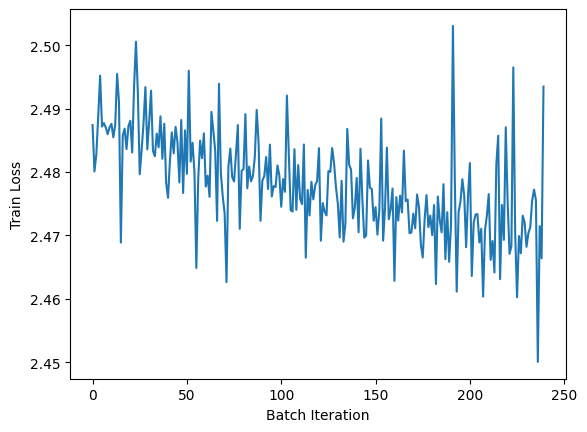

In [228]:
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

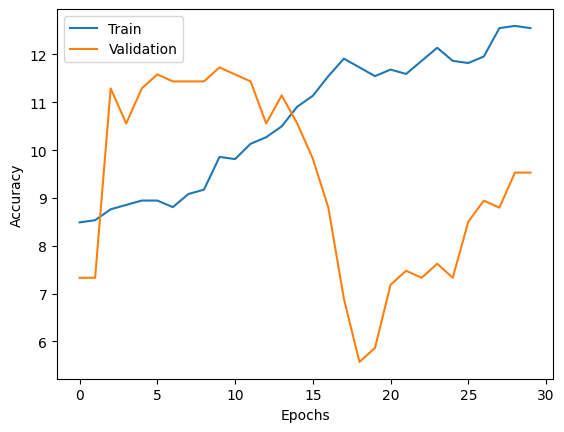

In [229]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

LSTM with PyTorch

In [183]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = padded_sequences.shape[2]
hidden_size = 100  # Number of hidden units in RNN
num_classes = 12  # For three-class classification
epochs = 30
learning_rate = 0.05
batch_size = 300
landa = 0.001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(padded_sequences, dtype=t.float32), t.tensor(targets, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(padded_sequences_test, dtype=t.float32), t.tensor(targets_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.Softmax()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

Epoch 0/30 ---> Train Accuracy: 9.082610680054769%, Validation Accuracy: 8.064516129032258%
Epoch 1/30 ---> Train Accuracy: 9.812870835235053%, Validation Accuracy: 7.771260997067449%
Epoch 2/30 ---> Train Accuracy: 8.854404381560931%, Validation Accuracy: 4.69208211143695%
Epoch 3/30 ---> Train Accuracy: 9.767229575536286%, Validation Accuracy: 6.011730205278592%
Epoch 4/30 ---> Train Accuracy: 9.812870835235053%, Validation Accuracy: 8.211143695014663%
Epoch 5/30 ---> Train Accuracy: 10.771337288909175%, Validation Accuracy: 4.105571847507331%
Epoch 6/30 ---> Train Accuracy: 10.26928343222273%, Validation Accuracy: 6.3049853372434015%
Epoch 7/30 ---> Train Accuracy: 11.501597444089457%, Validation Accuracy: 4.838709677419355%
Epoch 8/30 ---> Train Accuracy: 12.140575079872205%, Validation Accuracy: 7.771260997067449%
Epoch 9/30 ---> Train Accuracy: 12.551346417161113%, Validation Accuracy: 7.478005865102639%
Epoch 10/30 ---> Train Accuracy: 12.916476494751254%, Validation Accuracy: 1

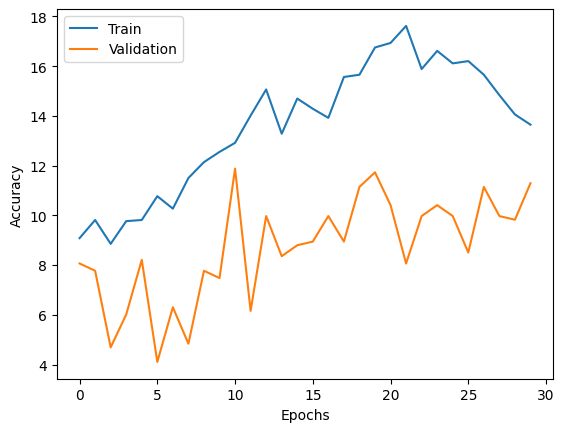

In [185]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()